In [110]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [111]:
#Run only 1st time
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [112]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle/human_activity_recognition

/content/gdrive/My Drive/Kaggle/human_activity_recognition


In [113]:
#Check the present working directory
import os
os.getcwd() 


'/content/gdrive/My Drive/Kaggle/human_activity_recognition'

In [114]:
#check the content in our directory
!ls

finalized_model.sav  test.csv  train.csv


#### 1) Importing Libraries

In [115]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix


In [117]:
from sklearn.svm import SVC
from sklearn.utils import shuffle


In [118]:
print(tf.__version__)

2.5.0


#### 2) Importing Dataset

In [119]:
train,test = pd.read_csv('train.csv'),pd.read_csv("test.csv")
display(train,test)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.000000,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.000000,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.000000,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.9932

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

In [120]:
train.shape

(7352, 563)

In [121]:
test.shape

(2947, 563)

#### 3) Data cleaning and Analysis

In [122]:
# We want to replace missing values i.e "?" with "NaN"
train.replace("?", np.nan, inplace = True)
test.replace("?", np.nan, inplace = True)
train,test

(      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  subject          Activity
 0              0.288585          -0.020294  ...        1          STANDING
 1              0.278419          -0.016411  ...        1          STANDING
 2              0.279653          -0.019467  ...        1          STANDING
 3              0.279174          -0.026201  ...        1          STANDING
 4              0.276629          -0.016570  ...        1          STANDING
 ...                 ...                ...  ...      ...               ...
 7347           0.299665          -0.057193  ...       30  WALKING_UPSTAIRS
 7348           0.273853          -0.007749  ...       30  WALKING_UPSTAIRS
 7349           0.273387          -0.017011  ...       30  WALKING_UPSTAIRS
 7350           0.289654          -0.018843  ...       30  WALKING_UPSTAIRS
 7351           0.351503          -0.012423  ...       30  WALKING_UPSTAIRS
 
 [7352 rows x 563 columns],
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  subject 

In [123]:
#checking the missing values in every column
missing_values_train = train.isnull()
missing_values_test = test.isnull()
for column in missing_values_train.columns.values.tolist():
    print(column)
    print (missing_values_train[column].value_counts())

tBodyAcc-mean()-X
False    7352
Name: tBodyAcc-mean()-X, dtype: int64
tBodyAcc-mean()-Y
False    7352
Name: tBodyAcc-mean()-Y, dtype: int64
tBodyAcc-mean()-Z
False    7352
Name: tBodyAcc-mean()-Z, dtype: int64
tBodyAcc-std()-X
False    7352
Name: tBodyAcc-std()-X, dtype: int64
tBodyAcc-std()-Y
False    7352
Name: tBodyAcc-std()-Y, dtype: int64
tBodyAcc-std()-Z
False    7352
Name: tBodyAcc-std()-Z, dtype: int64
tBodyAcc-mad()-X
False    7352
Name: tBodyAcc-mad()-X, dtype: int64
tBodyAcc-mad()-Y
False    7352
Name: tBodyAcc-mad()-Y, dtype: int64
tBodyAcc-mad()-Z
False    7352
Name: tBodyAcc-mad()-Z, dtype: int64
tBodyAcc-max()-X
False    7352
Name: tBodyAcc-max()-X, dtype: int64
tBodyAcc-max()-Y
False    7352
Name: tBodyAcc-max()-Y, dtype: int64
tBodyAcc-max()-Z
False    7352
Name: tBodyAcc-max()-Z, dtype: int64
tBodyAcc-min()-X
False    7352
Name: tBodyAcc-min()-X, dtype: int64
tBodyAcc-min()-Y
False    7352
Name: tBodyAcc-min()-Y, dtype: int64
tBodyAcc-min()-Z
False    7352
Name: tBody

In [124]:
for column in missing_values_test.columns.values.tolist():
    print(column)
    print (missing_values_test[column].value_counts())


tBodyAcc-mean()-X
False    2947
Name: tBodyAcc-mean()-X, dtype: int64
tBodyAcc-mean()-Y
False    2947
Name: tBodyAcc-mean()-Y, dtype: int64
tBodyAcc-mean()-Z
False    2947
Name: tBodyAcc-mean()-Z, dtype: int64
tBodyAcc-std()-X
False    2947
Name: tBodyAcc-std()-X, dtype: int64
tBodyAcc-std()-Y
False    2947
Name: tBodyAcc-std()-Y, dtype: int64
tBodyAcc-std()-Z
False    2947
Name: tBodyAcc-std()-Z, dtype: int64
tBodyAcc-mad()-X
False    2947
Name: tBodyAcc-mad()-X, dtype: int64
tBodyAcc-mad()-Y
False    2947
Name: tBodyAcc-mad()-Y, dtype: int64
tBodyAcc-mad()-Z
False    2947
Name: tBodyAcc-mad()-Z, dtype: int64
tBodyAcc-max()-X
False    2947
Name: tBodyAcc-max()-X, dtype: int64
tBodyAcc-max()-Y
False    2947
Name: tBodyAcc-max()-Y, dtype: int64
tBodyAcc-max()-Z
False    2947
Name: tBodyAcc-max()-Z, dtype: int64
tBodyAcc-min()-X
False    2947
Name: tBodyAcc-min()-X, dtype: int64
tBodyAcc-min()-Y
False    2947
Name: tBodyAcc-min()-Y, dtype: int64
tBodyAcc-min()-Z
False    2947
Name: tBody

In [125]:
train.isnull().values.any() #Missing values in train

False

In [126]:
test.isnull().values.any() #Missing values in test set

False

'False' mean that there is no missing value in each column.

In [127]:
print('Training: ',train.dtypes)
print('---------')
print('Test:  ', test.dtypes)

Training:  tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object
---------
Test:   tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object


In [128]:
print(train.info())
print('----------------')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
None
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB
None


In [129]:
train.groupby('Activity').count()#No of samples in each class in training set

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
Activity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LAYING,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,...,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407
SITTING,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,...,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286
STANDING,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,...,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374
WALKING,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,...,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226
WALKING_DOWNSTAIRS,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,...,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986

In [130]:
test.groupby('Activity').count()#No of samples in each class in test set

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
Activity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LAYING,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,...,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537
SITTING,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,...,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491
STANDING,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,...,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532
WALKING,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,...,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496
WALKING_DOWNSTAIRS,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,...,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420
WALKING_UPSTAIRS,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,47

In [131]:
print(train['Activity'].unique())
print('-----------')
print(test['Activity'].unique())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
-----------
['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [132]:

train['Activity'].value_counts()#Checking sample in each class of activity column

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

We can also represent different activities with the help of bar graph.

Text(0.5, 0, 'Activity')

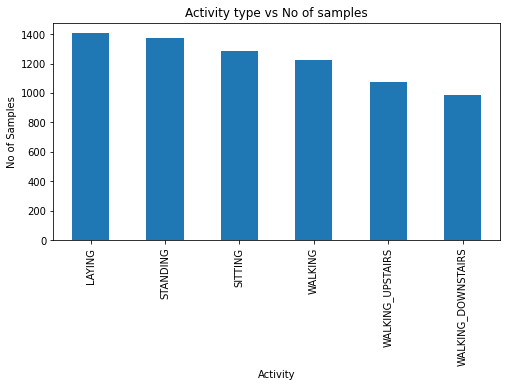

In [133]:
acts=train['Activity'].value_counts()
acts.plot(kind='bar',title='Activity type vs No of samples',figsize=(8,4))
plt.ylabel('No of Samples')
plt.xlabel('Activity')

In [134]:
#Shuffling the dataframes
train=shuffle(train)
test=shuffle(test)
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
1976,0.278810,-0.016664,-0.109526,-0.995344,-0.992812,-0.993089,-0.996147,-0.992916,-0.993905,-0.940374,-0.570282,-0.823811,0.843698,0.694145,0.839613,-0.996695,-0.999969,-0.999962,-0.999884,-0.996720,-0.993168,-0.995398,-0.584878,-0.669510,-0.655214,0.067824,0.073312,-0.208996,0.393772,0.220012,-0.093582,0.179266,0.106964,0.228300,-0.014820,0.180896,-0.035321,-0.338665,0.220201,-0.342519,...,-1.000000,-0.904762,0.269731,-0.664626,-0.917829,-0.998901,-0.998625,-0.998885,-0.999014,-0.998779,-0.998901,-0.999995,-0.999394,-1.000000,-0.384615,0.433892,-0.590904,-0.885071,-0.999083,-0.998905,-0.998674,-0.999437,-0.997987,-0.999083,-0.999997,-0.997843,-1.000000,-0.206349,0.482271,-0.814532,-0.950751,-0.284857,0.240913,-0.178630,-0.165843,0.341225,-0.796855,-0.099409,11,LAYING
1149,0.323698,-0.039466,-0.104092,-0.090252,0.100840,-0.437074,-0.126709,0.029348,-0.413807,0.149050,0.157863,-0.460710,0.171424,-0.079817,0.512510,-0.068432,-0.584713,-0.765102,-0.854375,-0.260264,-0.221345,-0.376572,0.097513,0.124725,0.050150,-0.577526,0.503328,-0.451129,0.447455,-0.388128,0.208947,0.312425,-0.321111,-0.381712,0.213028,0.189943,-0.402036,-0.318321,0.037068,0.143558,...,0.160510,-0.904762,-0.045187,-0.219189,-0.616257,-0.331274,-0.244660,-0.160790,-0.346629,-0.826036,-0.331274,-0.675106,-0.329155,0.555485,-1.000000,-0.150108,-0.317154,-0.666029,-0.604835,-0.721456,-0.664288,-0.754646,-0.641533,-0.604835,-0.934449,-0.646330,0.327203,-0.904762,0.271154,-0.469002,-0.785596,-0.624055,-0.749893,-0.975895,-0.720731,-0.680649,0.316962,0.046287,6,WALKING_UPSTAIRS
6581,0.398657,-0.032493,-0.123249,0.065717,0.184588,-0.395243,0.005806,0.122787,-0.388965,0.374777,-0.035354,-0.202815,0.117080,-0.405965,0.424122,0.031669,-0.428540,-0.728964,-0.832284,-0.205329,-0.107781,-0.351506,0.290791,0.310933,0.171914,-0.189960,0.101815,-0.155336,0.401936,0.132910,-0.112897,0.350367,-0.168478,0.348343,-0.000063,0.061917,-0.039302,-0.544568,-0.258119,-0.002025,...,0.619971,-0.873016,0.081492,-0.107939,-0.456903,-0.408013,-0.516755,-0.431335,-0.661783,-0.916416,-0.408013,-0.825084,-0.4125

In [135]:
train.corr()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,-0.007875,-0.075881,0.078354,0.021214,-0.003283,-0.029204,0.016582,-0.040811,-0.085116,0.020762,-0.024179,-0.054570,0.148508,0.006747,-0.084416,0.019447,0.012241,-0.041704,0.049486,0.023920,0.011185,-0.045147,0.056905,0.036627,0.008888,-0.019158,0.001150,0.027287,0.089583,-0.010590,...,0.020264,-0.007249,0.017466,0.055514,-0.032586,-0.027283,-0.005990,-0.025629,-0.021627,-0.028736,0.002004,-0.005990,-0.012038,-0.003913,-0.017451,0.034239,0.050053,-0.017158,-0.012325,0.008362,0.006094,0.006916,0.006751,0.007878,0.008362,0.017109,0.011356,-0.015953,0.008751,0.030681,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242,0.024181
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,0.090189,-0.057029,0.058568,0.132042,0.037539,-0.046390,-0.030475,-0.061759,-0.061180,-0.043231,-0.046717,-0.054820,-0.003331,0.195152,-0.023682,0.033899,-0.043617,0.041133,-0.039958,0.021360,-0.028782,0.018448,-0.005915,0.019412,-0.020604,0.023630,-0.024073,-0.002270,0.009803,0.047280,...,-0.045111,-0.048655,-0.000976,-0.012220,-0.004139,-0.004726,-0.047916,-0.055582,-0.056716,-0.053106,-0.015493,-0.047916,-0.046806,-0.052700,-0.042685,0.002729,0.004438,0.001864,0.000621,-0.034307,-0.032599,-0.033867,-0.030778,-0.030126,-0.034307,-0.018531,-0.037269,-0.040870,-0.008536,-0.022395,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903,-0.003144
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,-0.027803,0.110455,0.006544,0.013678,0.119078,-0.008180,-0.012748,-0.000758,0.024404,-0.016711,-0.014024,0.011974,-0.088150,-0.006791,0.293465,0.007290,-0.005728,-0.002225,-0.004501,0.008761,-0.018650,0.014740,0.002206,0.013838,-0.021596,0.012926,0.000378,0.018856,-0.021641,0.024154,...,-0.029434,-0.024013,-0.017871,-0.027895,0.031832,0.029326,-0.037371,-0.047118,-0.0

In [136]:
x_train=train.drop(columns=['Activity','subject'],axis=1)#
y_train=train['Activity']
x_test=test.drop(columns=['Activity','subject'],axis=1)
y_test=test['Activity']


We are now going to perform label encoding for the column 'Activity'.

In [137]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

print('y_train= ',y_train)
print('y_test= ',y_test)

y_train=  [0 5 4 ... 1 2 2]
y_test=  [1 2 5 ... 5 2 3]


In [138]:
encoder.classes_# These are the classis that we have encoded

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [139]:
x_test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,-0.303028,-0.574975,0.529679,0.394903,0.607122,-0.563359,-0.838978,-0.904777,-0.876810,-0.701179,-0.642868,-0.664678,-0.093694,-0.105883,-0.142690,-0.124831,0.123073,-0.030495,0.100853,-0.038277,0.045200,0.143128,-0.014339,-0.002145,0.048802,0.029028,-0.092721,-0.108279,-0.207585,0.095198,...,-0.838025,-0.671666,-0.315550,-0.877314,0.160807,-0.262749,-0.567276,-0.707893,-0.717690,-0.696441,-0.754527,-0.897678,-0.707893,-0.898787,-0.727937,-0.047341,-0.880905,-0.029208,-0.290799,-0.601914,-0.780744,-0.791688,-0.774820,-0.806254,-0.869391,-0.780744,-0.943172,-0.775752,-0.248673,-0.902963,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,0.274075,0.253431,0.338503,0.326645,0.271650,0.434127,0.211957,0.125120,0.157134,0.325979,0.362060,0.331992,0.445319,0.423831,0.359451,0.310705,0.247947,0.257935,0.235618,0.246854,0.20987

In [140]:
x_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.842188,-0.678618,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001

It is important to scale the data first.

In [141]:
scaler=StandardScaler()#scaling data
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train,x_test

(array([[ 0.06151818,  0.0252632 , -0.00679147, ...,  1.62332563,
         -2.87584307, -0.15368582],
        [ 0.70043294, -0.53348073,  0.08916407, ..., -0.3734118 ,
          0.86858592,  0.36832987],
        [ 1.76735903, -0.36262553, -0.24912108, ..., -0.52516101,
          0.64636094,  0.51555302],
        ...,
        [ 0.06727593,  0.00488229, -0.02521978, ..., -0.08628551,
         -0.56611805, -0.63601037],
        [ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
          0.40794614, -0.00756789],
        [ 0.08666587,  0.09680599,  0.09342902, ..., -0.39221068,
          0.4841207 ,  0.96042576]]),
 array([[ 0.02239869,  0.03884638,  0.1772611 , ..., -0.65766044,
          0.36913311,  0.10087909],
        [-0.91121665, -1.4477018 ,  2.16763779, ..., -0.27608696,
          0.69967302, -0.24733377],
        [-1.62409365, -0.74638798,  0.63428846, ..., -0.17434961,
         -0.20289294,  1.39828493],
        ...,
        [ 1.56353389,  0.85917275, -1.14859359, ..., -

In [142]:
print('shape of x_train=  ',x_train.shape,',   shape of y_train=  ',y_train.shape,',    shape of x_test=  ',x_test.shape,',    shape of y_test=   ',y_test.shape)

shape of x_train=   (7352, 561) ,   shape of y_train=   (7352,) ,    shape of x_test=   (2947, 561) ,    shape of y_test=    (2947,)


#### 4-Building the model

In [143]:
#performing grid search for best parameters selection
grid_param = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['linear']},
 ]#different types of kernals in SVM are 'rbf','linear' and 'polynomial' kernals
#Tuning best parameters to fit SVM
model = GridSearchCV(SVC(), grid_param,cv=5)#Perform CV to tune best parameters for SVM model


In [144]:
model.fit(x_train, y_train)# Training the SVM model

main_model=model.best_estimator_ #model with tuned parameters

print(main_model)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [145]:
#Saving the model
import pickle

filename = 'finalized_model.sav'
pickle.dump(main_model, open(filename, 'wb'))

In [146]:
#Reloading the model

loaded_model = pickle.load(open(filename, 'rb'))

#### 5) Evaluating the Model

In [148]:
#Training set score
print(loaded_model.score(x_train , y_train))


1.0


In [149]:
#Test set score
print(loaded_model.score(x_test , y_test))

0.9626739056667798


#### 6) Prediction

In [147]:
#predicting
y_pred = loaded_model.predict(x_test)#predicting

In [150]:
print('predicted values(20:25): ',y_pred[20:25], ',    actual values(20:25):',y_test[20:25])

predicted values(20:25):  [5 1 5 0 5] ,    actual values(20:25): [5 1 5 0 5]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


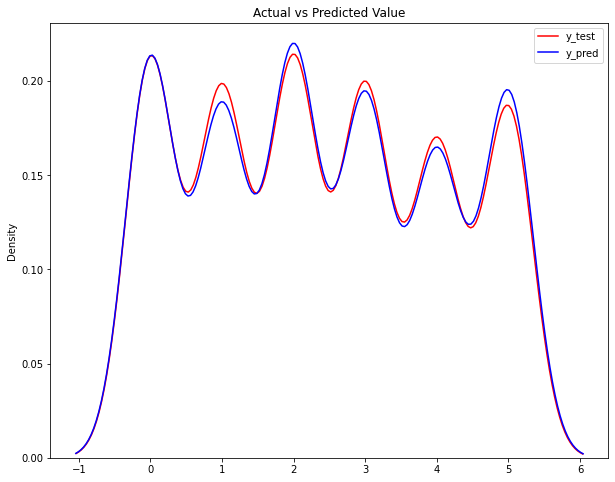

In [151]:
# Plotting the Actual and Predicted values
import seaborn as sns
plt.figure(figsize=(10, 8))

ax = sns.distplot(y_test, hist=False, color="r")
sns.distplot(y_pred, hist=False, color="b" , ax=ax)

plt.title('Actual vs Predicted Value')

plt.legend(['y_test', 'y_pred'])